In [1]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
data = pd.read_csv("../data/UCF-crime-frames-descriptions-partitions.csv")

In [3]:
video_name = [f.split("_")[0] for f in data["frame"]]
data["vn"] = video_name

In [4]:
train = data.loc[data["partition"] == "train"]
val = data.loc[data["partition"] == "validation"]
test = data.loc[data["partition"] == "test"]

X = np.load("../data/train_lavis.npy")
V = np.load("../data/val_lavis.npy")
X = torch.tensor(X, dtype=torch.float32)
V = torch.tensor(V, dtype=torch.float32)
y = list(train["class"])
y = np.array([utils.labels[lbl] for lbl in y])
y = torch.tensor(y, dtype=torch.float32)
y_val = list(val["class"])
y_val = np.array([utils.labels[lbl] for lbl in y_val])
y_val = torch.tensor(y_val, dtype=torch.float32)

In [5]:
model = nn.Sequential(
    nn.Linear(768, 256),
    nn.ReLU(),
    nn.Linear(256, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

In [6]:
model.load_state_dict(torch.load("models/model_image_lavis_features.pt"))

<All keys matched successfully>

In [7]:
final = nn.Sequential(model, torch.nn.Softmax(dim = 1))

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
final.to(device)

Sequential(
  (0): Sequential(
    (0): Linear(in_features=768, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=10, bias=True)
  )
  (1): Softmax(dim=1)
)

In [9]:
utils.labels

{'Normal': 0,
 'Abuse': 1,
 'Arrest': 2,
 'Arson': 3,
 'Burglary': 4,
 'Explosion': 5,
 'Fighting': 6,
 'RoadAccidents': 7,
 'Shooting': 8,
 'Vandalism': 9}

In [10]:
val_pred = utils.evaluate(V, final, device, 64)

In [11]:
utils.get_acc(val_pred, y_val)

tensor(0.6306)

In [12]:
utils.get_acc(utils.put_momentum_per_video(val_pred, list(val["vn"])), y_val)

tensor(0.6634)

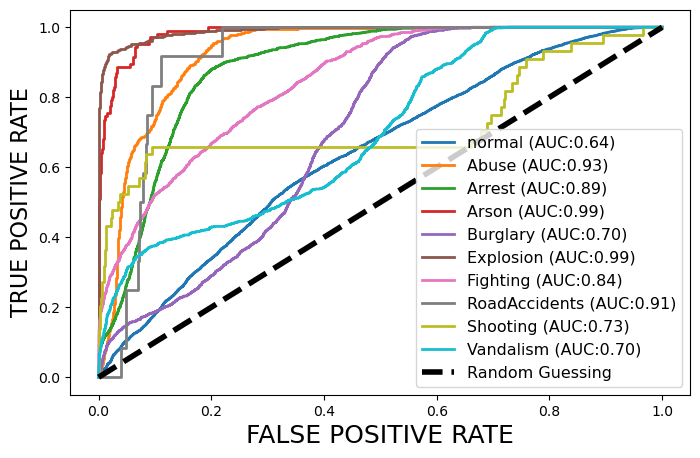

ROC AUC score: 0.8309644515783907


In [13]:
print('ROC AUC score:', utils.multiclass_roc_auc_score(y_val , val_pred, average = "macro"))

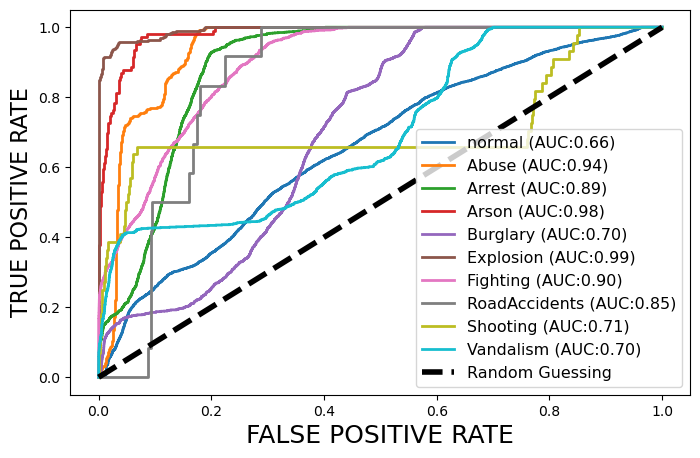

ROC AUC score: 0.8320312589925175


In [14]:
print('ROC AUC score:', utils.multiclass_roc_auc_score(y_val , utils.put_momentum_per_video(val_pred, list(val["vn"])), average = "macro"))

In [15]:
video = data.loc[data["vn"] == "Vandalism046"]
print(video["partition"].head(1))

145556    test
Name: partition, dtype: object


In [16]:
path = "d:/data/UCF-crime/Anomaly-Videos-frames-lavis-features"
video_feat, y = utils.get_data(video, path, n=768)

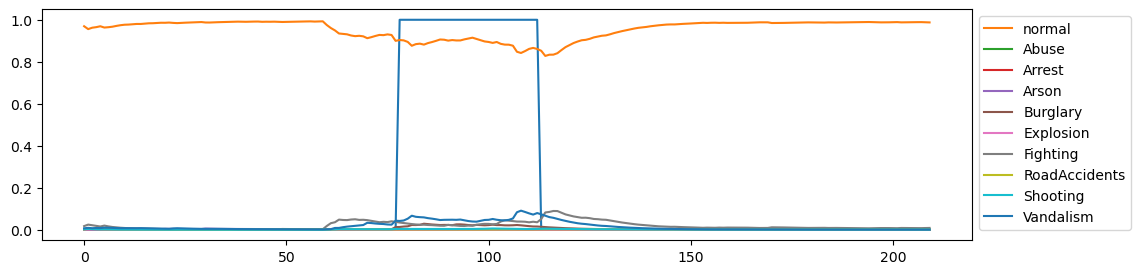

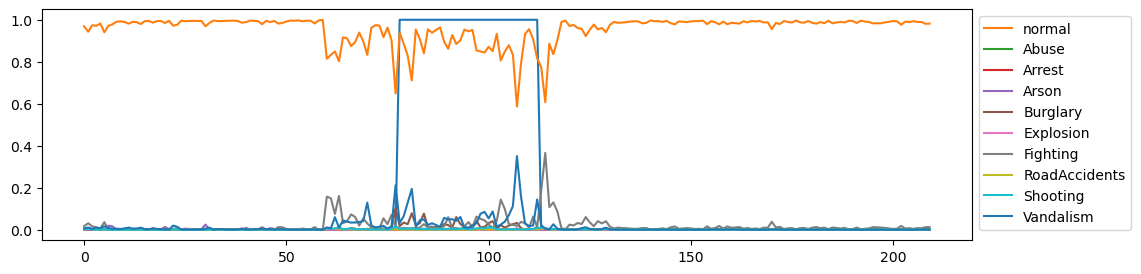

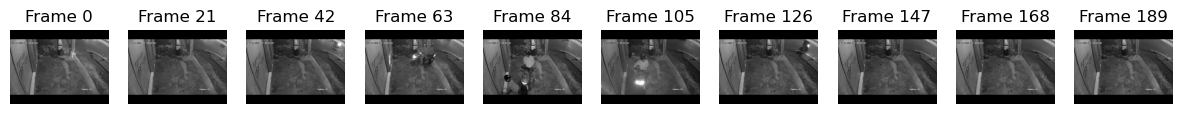

In [18]:
batch_size = 64
pred = utils.evaluate(video_feat, final, device, batch_size)
utils.plot_results(y!=0, utils.put_momentum(pred))
utils.plot_results(y!=0, pred)
utils.show_frames(video, n=10)

In [29]:
video = data.loc[data["vn"] == "Abuse045"]
print(video["partition"].head(1))

17548    validation
Name: partition, dtype: object


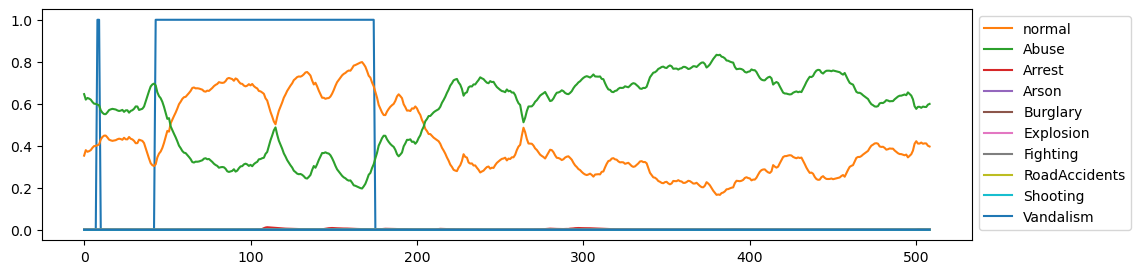

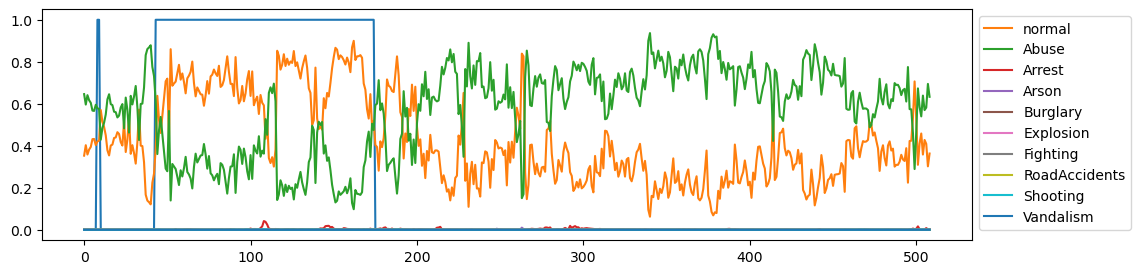

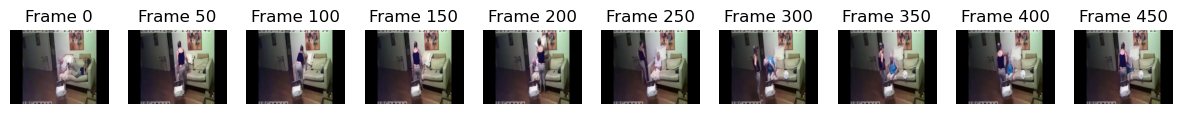

In [30]:
video_feat, y = utils.get_data(video, path, n=768)
pred = utils.evaluate(video_feat, final, device, batch_size)
utils.plot_results(y!=0, utils.put_momentum(pred))
utils.plot_results(y!=0, pred)
utils.show_frames(video, n=10)

In [21]:
video = data.loc[data["vn"] == "Arrest043"]
print(video["partition"].head(1))

45744    validation
Name: partition, dtype: object


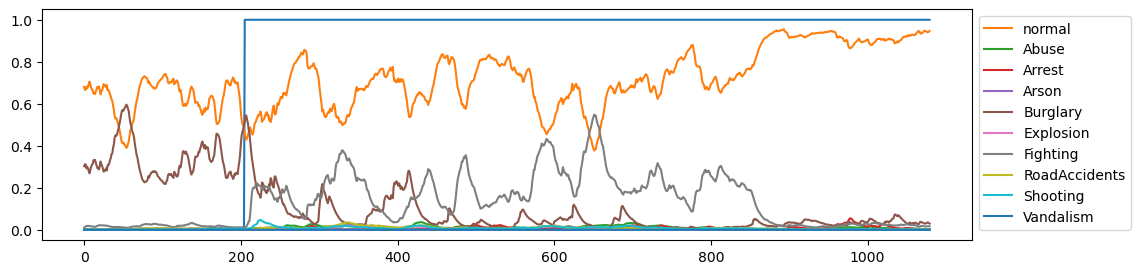

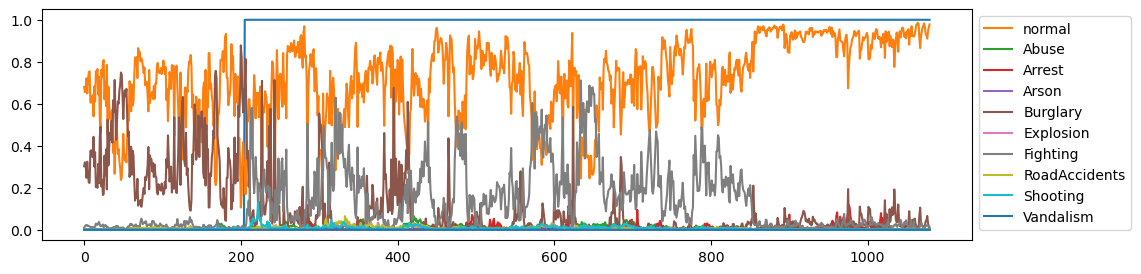

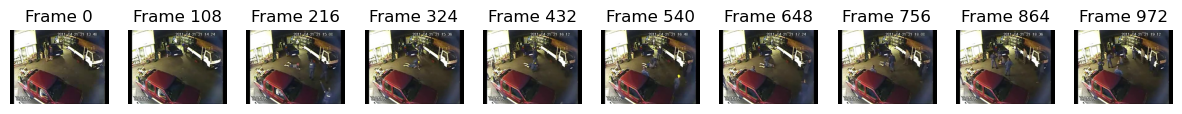

In [22]:
video_feat, y = utils.get_data(video, path, n=768)
pred = utils.evaluate(video_feat, final, device, batch_size)
utils.plot_results(y!=0, utils.put_momentum(pred))
utils.plot_results(y!=0, pred)
utils.show_frames(video, n=10)

In [31]:
video = data.loc[data["vn"] == "Fighting044"]
print(video["partition"].head(1))

167440    validation
Name: partition, dtype: object


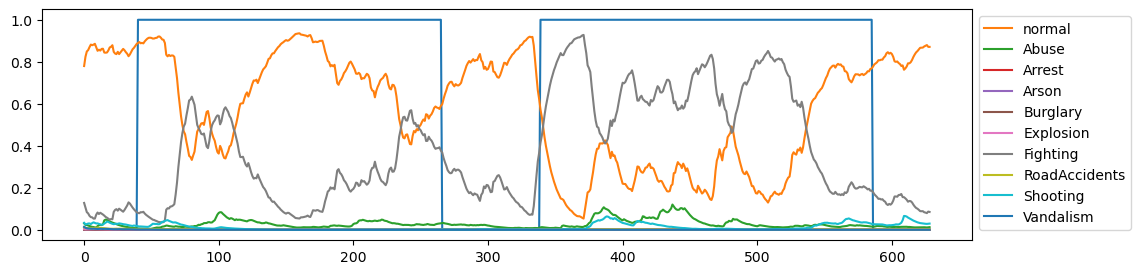

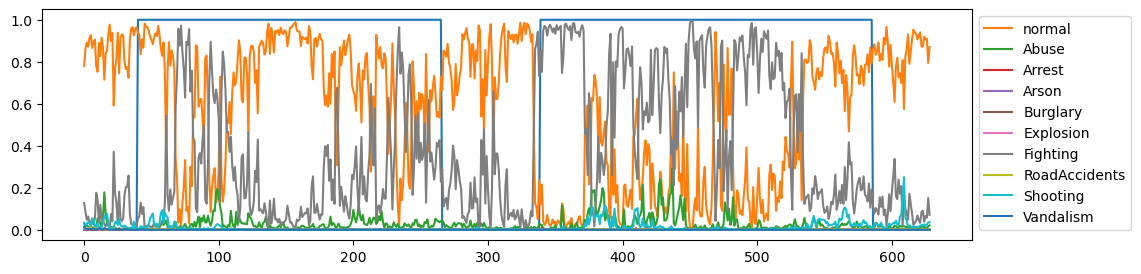

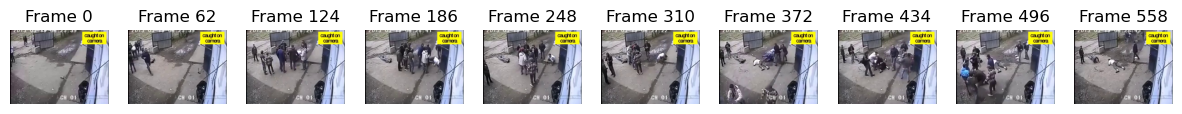

In [32]:
video_feat, y = utils.get_data(video, path, n=768)
pred = utils.evaluate(video_feat, final, device, batch_size)
utils.plot_results(y!=0, utils.put_momentum(pred))
utils.plot_results(y!=0, pred)
utils.show_frames(video, n=10)